In [1]:
# Import All Libraries : 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# lets load dataset
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
'''

_____________________________________VARIABLE DESCRIPTIONS OF DATAFRAME TITANIC_________________________________________________

PassengerId 
survival Survival (0 = No; 1 = Yes)
Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name 
Sex 
Age
sibsp Number of Siblings/Spouses Aboard
parch Number of Parents/Children Aboard
Ticket Number
fare Passenger Fare (British pound)
Cabin
embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

'''

'\n\n_____________________________________VARIABLE DESCRIPTIONS OF DATAFRAME TITANIC_________________________________________________\n\nPassengerId \nsurvival Survival (0 = No; 1 = Yes)\nPclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)\nName \nSex \nAge\nsibsp Number of Siblings/Spouses Aboard\nparch Number of Parents/Children Aboard\nTicket Number\nfare Passenger Fare (British pound)\nCabin\nembarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)\n\n'

In [4]:
# Lets Check the columns in dataframe
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# To chk duplicate rows
df.duplicated().sum()

0

In [6]:
# Let's Discuss and remove unwanted columns from the dataset
# 1. Passenger Id : a unique number is assigned to all passengers as per their booking 
        # But it will not help us in prediction (So, we will remove passenger Id from the dataset)
# 2. Name : Passenger personal information will also not work , as we are doing future prediction( So will remove that as well)
# 3. Sibsp : Number of Siblings/Spouses Aboard ,is not required for prediction 
# 4. Parch : Number of Parents or Children Aboard , is not required for prediction 
# 5. Ticket : Ticket number is again an system generated unique code assigned to passenger for security purpose , Not Useful 

In [7]:
# Removing unwanted columns from dataset
df.drop(['PassengerId','Name','Parch', 'Ticket','SibSp'],axis=1,inplace =True)

In [8]:
# Display dataframe
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,male,22.0,7.2500,NaN,S
1,1,1,female,38.0,71.2833,C85,C
2,1,3,female,26.0,7.9250,NaN,S
3,1,1,female,35.0,53.1000,C123,S
4,0,3,male,35.0,8.0500,NaN,S


In [9]:
# let's check null values in each column of given dataset
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
'''
So Here we see null values in Age , Cabin & Embarked columns
we remove the column if we find null values from data if its more than 50% and other will be filled by mean of that columns
**Total number of rows is 891
                             Calculation of null values will be done as mentioned below:
For Age : 177/891*100 
For Cabin : 687/891*100
For Embarked : 2/891*100

Lets get the result of all null values by applying the formula
'''

'\nSo Here we see null values in Age , Cabin & Embarked columns\nwe remove the column if we find null values from data if its more than 50% and other will be filled by mean of that columns\n**Total number of rows is 891\n                             Calculation of null values will be done as mentioned below:\nFor Age : 177/891*100 \nFor Cabin : 687/891*100\nFor Embarked : 2/891*100\n\nLets get the result of all null values by applying the formula\n'

In [11]:
# Lets find the percentage of null values from dataset
df.isnull().sum()/df.shape[0]*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [12]:
# Lets Start with Age Column
# As in age column null value's percentage is less than 50% 
# we wil find the mean of age column 
# and fill null values 
m=df['Age'].mean()
# To fill null values in age column with mean of age column permenatly
df['Age'].fillna(m,inplace=True)

In [13]:
# To check null value after filling in age column
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
# Lets check the highest frequency of Embraked column , So that we can fill in  place of null value in Embarked column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
# S-section has 644 which is highest number
#To fill null values of Embarked column with 's' 
df['Embarked'].fillna('s',inplace=True)

In [16]:
# Let's check null value after filling
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [17]:
# As we see Cabin Column has more than 50 % data which is null...
# So we will remove the cabin column , As cabin number is not mentioned in half of the dataframe
# To remove cabin column permentely from given dataset
df.drop('Cabin',axis=1,inplace=True)

In [18]:
# Check null value after drop
# No Null values left in dataframe
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

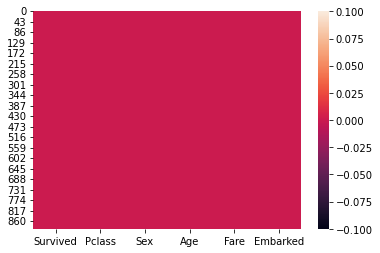

In [19]:
# Recheck the null values using heatmap for better clarification
sb.heatmap(df.isnull())
plt.show()

In [20]:
# Let's check the datatype mentioned and actual datatypes matches or not
# To check datatypes
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
Fare        float64
Embarked     object
dtype: object

In [21]:
# How many rows and columns
df.shape

(891, 6)

In [22]:
# All infoemation of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [23]:
df.head()
# Datatype and null values are done
# Lets Move Forward...!

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [24]:
# Before sending data to machine ...We have to check all columns should be numberic 
# However , all columns in dataframe is numberic expect Sex & Embarked column
# Lets convert the data using LabelEncoder 
# Apply lable encoder in sex and embarked columns
# Load Library for LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [25]:
# Create object of LabelEncoder class
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Embarked']=le.fit_transform(df['Embarked'])

In [26]:
# To check data type after convertion (sex,embarked)into numberic
df.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
Fare        float64
Embarked      int32
dtype: object

In [27]:
# Let's Check the Dataframe before sending to machine
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [28]:
# So Here we are done with EDA & processing of Titanc DataFrame
# Removed Unwanted Columns
# Analysied and Filled null Values and dropped column having more than 50% null value
# Checked Datatypes
# Using LabelEncoder , Converted the columns in numberic format.

In [29]:
# As Survived is our target variable , lets check the attributes of columns
df['Survived'].unique()

array([0, 1], dtype=int64)

In [30]:
# Detail of Target variable
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

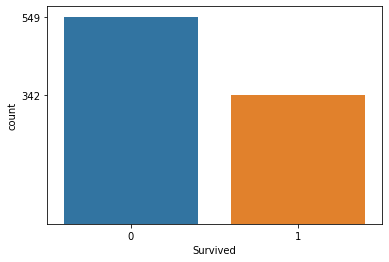

In [31]:
# Visualize the column using Countplot
sb.countplot(data=df,x='Survived')
f=df['Survived'].value_counts()
plt.yticks(f)
plt.show()

In [32]:
# Selecting input and output from dataset df
X=df.drop('Survived',axis=1)# select input
Y=df['Survived']# output

In [33]:
# lets import & split the data using train_test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [34]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((623, 5), (268, 5), (623,), (268,))

In [35]:
df.shape

(891, 6)

In [36]:
# create a function 
def create_model(model): # Model user define which hold the object of algo
    #train the model
    model.fit(X_train,Y_train)
    #Test model with 30% data
    Y_pred = model.predict(X_test)
    # Generate Report
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [37]:
# Perform the model with help of logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
# Create a object for Logistic regression
lr=LogisticRegression()

In [39]:
# Call funtion and passing the ogbject of logisticRegression class
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       153
           1       0.76      0.68      0.72       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

[[129  24]
 [ 37  78]]


In [40]:
# Check score : It is also known as accuracy score (0-1)
# Using inbuilt method score() which define in logistic regession class
lr.score(X_test,Y_test) # accuracy score

0.7723880597014925